### Import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Customize 

In [5]:
# Set simulation parameters
N = 10000          # number of simulation runs
T = 1              # time horizon (in years)
r = 0.05           # risk-free rate (for discounting)
V0 = 100           # initial project value
sigma = 0.2        # volatility of project value

# Define the real option parameters
threshold = 120            # if the project value exceeds this, the expansion option can be exercised
expansion_multiplier = 1.2 # exercising the option increases the project value by 20%

#file names to save results
csv_file='0706 real_option_simulation.csv'
plot_file='0706 real_option_value_distribution.png'

### Simulate project values

In [7]:
# Simulate project value at time T using geometric Brownian motion
# Formula: S_T = S_0 * exp((r - 0.5 * sigma^2) * T + sigma * sqrt(T) * Z)
# where Z is a random variable drawn from a standard normal distribution.
Z = np.random.randn(N)
ST = V0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

### Calculate project values at different option 

In [9]:
# Calculate the project value without any managerial flexibility (no option)
project_value_no_option = ST

# Calculate the additional value provided by the real option:
# If the project value exceeds the threshold, the option adds extra value.
extra_value = np.where(ST > threshold, (expansion_multiplier - 1) * ST, 0)

# Total project value when the option is available
project_value_with_option = ST + extra_value

# Discount both values back to the present
PV_no_option = np.exp(-r * T) * project_value_no_option
PV_with_option = np.exp(-r * T) * project_value_with_option

# The option value is the difference between the project values with and without the option
option_value = PV_with_option - PV_no_option

### Compute options values, save and display

Average Project Value without Option: 100.05
Average Project Value with Option: 105.84
Average Option Value: 5.79
Simulation results saved in 0706 real_option_simulation.csv
Histogram saved in 0706 real_option_value_distribution.png


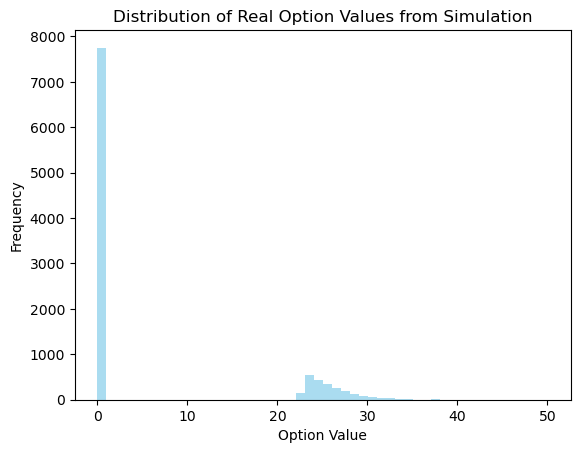

In [11]:
# Calculate average values across all simulations
avg_PV_no_option = np.mean(PV_no_option)
avg_PV_with_option = np.mean(PV_with_option)
avg_option_value = np.mean(option_value)

print("Average Project Value without Option: {:.2f}".format(avg_PV_no_option))
print("Average Project Value with Option: {:.2f}".format(avg_PV_with_option))
print("Average Option Value: {:.2f}".format(avg_option_value))

# Save data to CSV
output_data = pd.DataFrame({
    'Simulation_Number': np.arange(1, N + 1),
    'PV_No_Option': PV_no_option,
    'PV_With_Option': PV_with_option
})

output_data.to_csv(csv_file, index=False)
print(f"Simulation results saved in {csv_file}")

# Plot the distribution of the real option values
plt.hist(option_value, bins=50, alpha=0.7, color='skyblue')
plt.xlabel("Option Value")
plt.ylabel("Frequency")
plt.title("Distribution of Real Option Values from Simulation")

# Save plot as an image file
plt.savefig(plot_file, dpi=300)
print(f"Histogram saved in {plot_file}")
plt.show()
